In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.transforms as mtransforms

#GPU
# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

n_class = 100

Using cpu device


In [7]:
def shuffle(dataset, targets):
    
    idx = torch.randperm(targets.size(0))
    
    dataset = dataset[idx]
    targets = targets[idx]
    
    
    return [dataset, targets]

In [11]:
#data loader

n_sample = 60000

train_dataset=datasets.MNIST(root='/home/gbortolai/Thesis/data/MNIST', train=True, download=True, transform = transforms.ToTensor())

test_dataset=datasets.MNIST(root='/home/gbortolai/Thesis/data/MNIST', train=False, transform = transforms.ToTensor()) 

#train

data = torch.zeros(10 * n_class, 28, 28, dtype=torch.double).to(device)
targets = torch.zeros(10 * n_class, 1, dtype=torch.int).to(device)

train_targets = torch.zeros(n_sample, 1, dtype=torch.int).to(device)

for i in range (n_sample):
    train_targets[i]=train_dataset[i][1]


# test_targets = torch.zeros(n_sample,1,dtype=torch.int).to(device)

# for i in range (n_sample):
#     test_targets[i]=test_dataset[i][1]

l = 0
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    for j in torch.nonzero(train_targets == i)[400:400+n_class, 0]:
            data[l] =  train_dataset[j][0]
            targets[l] = train_dataset[j][1]
            l = l + 1

data, targets = shuffle(data, targets)
torch.save([data, targets],'/home/gbortolai/Thesis/data/MNIST/validation_eq_s='+str(n_class * 10))
# torch.save([test, targets_test],'/home/gbortolai/Thesis/data/MNIST/test_s='+str(n_sample_test))

torch.Size([100])


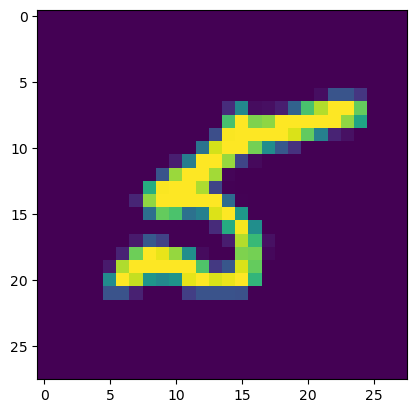

In [13]:
print(torch.nonzero(train_targets == 0)[1000:1000+n_class, 0].size())

plt.imshow(data[500])

train_data = torch.zeros(n_train,28,28, dtype=torch.double).to(device)
train_targets = torch.zeros(n_train,1,dtype=torch.int).to(device)

validation_data = torch.zeros(n_validation,28,28,dtype=torch.double).to(device)
validation_targets = torch.zeros(n_validation,1,dtype=torch.int).to(device)

for i in range (n_train):
    
    #data[i]=torch.reshape(train_dataset[i][0],(1,784)).to(device)
    train_data[i]=train_dataset[i][0].to(device)
    train_targets[i]=train_dataset[i][1]

k=0
for i in range (n_train, n_sample):

    validation_data[k]=train_dataset[i][0].to(device)
    validation_targets[k]=train_dataset[i][1]
    k = k+1

torch.save([train_data, train_targets, validation_data, validation_targets], '/home/gbortolai/Thesis/data/MNIST/train_validation_s=3000')
del train_data, train_targets, validation_data, validation_targets

#Wasserstein dist train and validaiton

W_dist, targets = torch.load('/home/gbortolai/Thesis/data/MNIST/Wasserstein_dist_train_s=3000', map_location = device)#mi manca la wasserstein

W_train = W_dist[0:n_train, 0:n_train].to(device)
W_validation = W_dist[n_train:n_sample, n_train:n_sample].to(device)

torch.save([W_train, W_validation],'/home/gbortolai/Thesis/data/MNIST/Wasserstein_dist_train_validation_s=3000')
del W_train, W_validation, targets

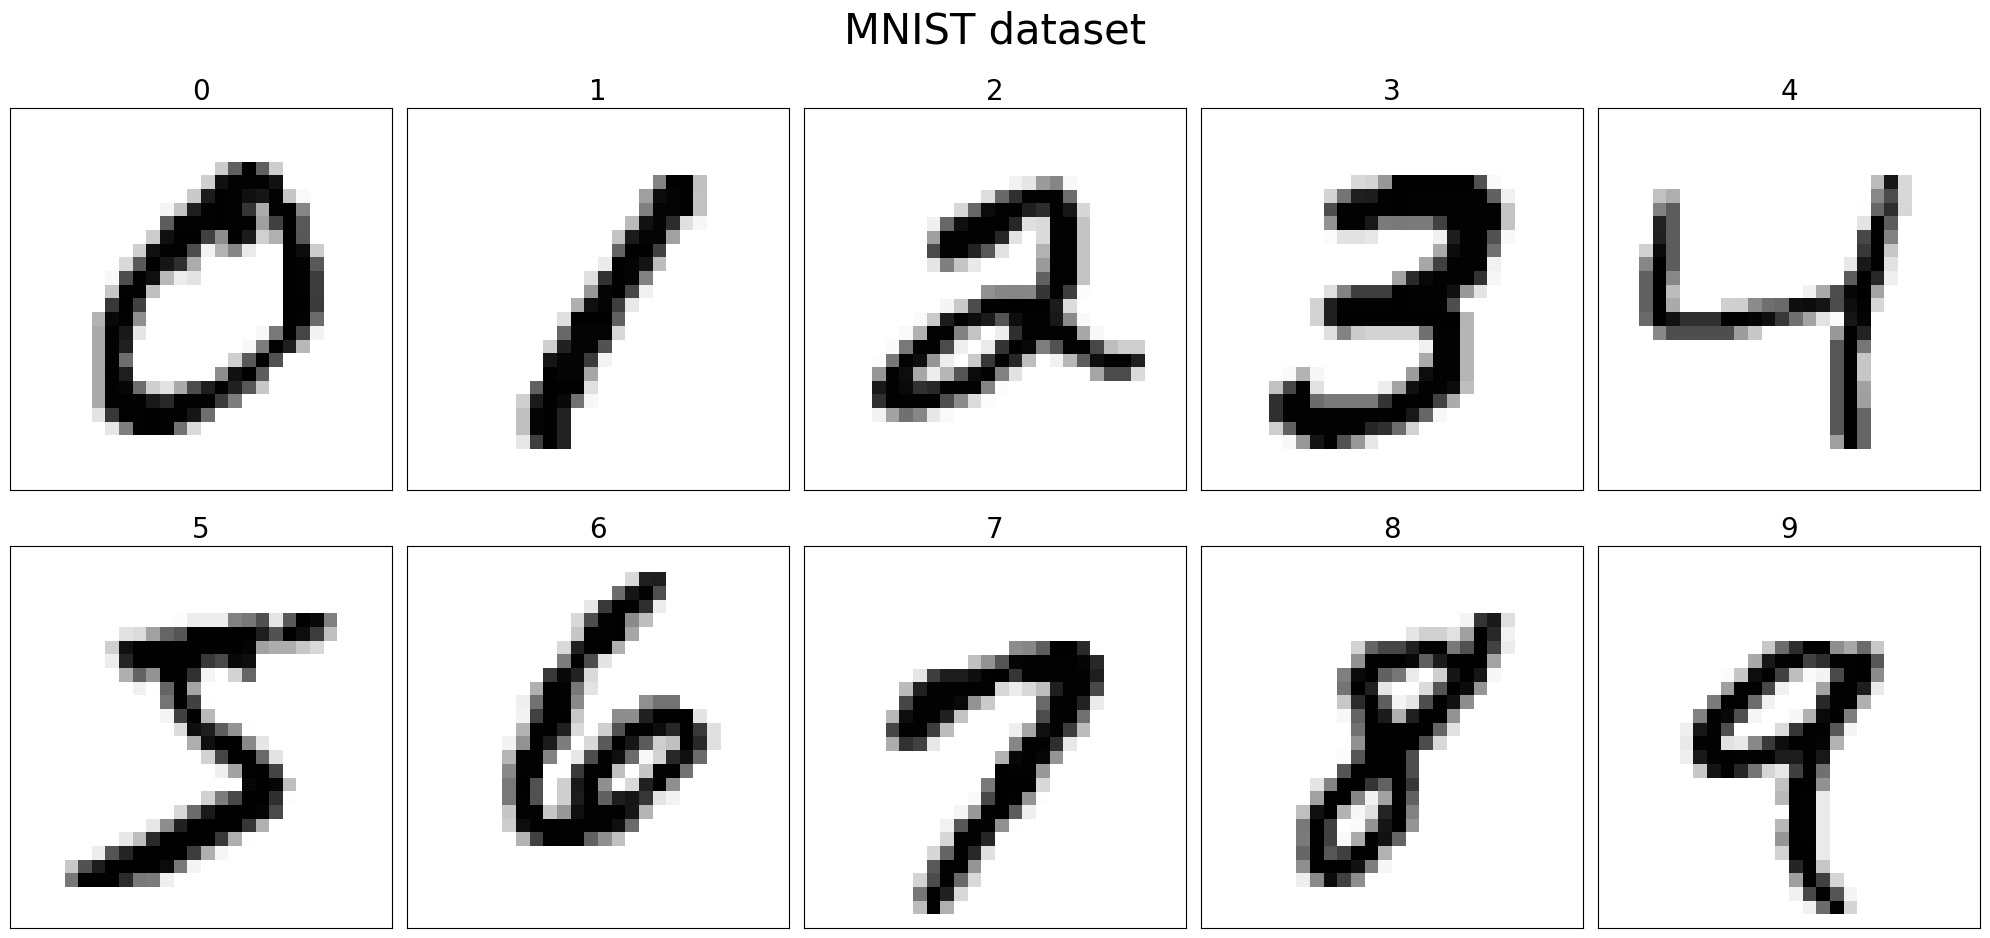

In [51]:
#Plot MNIST
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize = (20, 10), constrained_layout=False)
gs = GridSpec(2, 5, figure = fig)

fig.suptitle('MNIST dataset', fontsize = 30)

ax = fig.add_subplot(gs[0, 0])
ax.set_title('0', fontsize = 20)
ax.imshow(train_data[1], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax = fig.add_subplot(gs[0, 1])
ax.set_title('1', fontsize = 20)
ax.imshow(train_data[3], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax = fig.add_subplot(gs[0, 2])
ax.set_title('2', fontsize = 20)
ax.imshow(train_data[5], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax = fig.add_subplot(gs[0, 3])
ax.set_title('3', fontsize = 20)
ax.imshow(train_data[7], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax = fig.add_subplot(gs[0, 4])
ax.set_title('4', fontsize = 20)
ax.imshow(train_data[2], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax = fig.add_subplot(gs[1, 0])
ax.set_title('5', fontsize = 20)
ax.imshow(train_data[0], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax = fig.add_subplot(gs[1, 1])
ax.set_title('6', fontsize = 20)
ax.imshow(train_data[13], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax = fig.add_subplot(gs[1, 2])
ax.set_title('7', fontsize = 20)
ax.imshow(train_data[15], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax = fig.add_subplot(gs[1, 3])
ax.set_title('8', fontsize = 20)
ax.imshow(train_data[17], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax = fig.add_subplot(gs[1, 4])
ax.set_title('9', fontsize = 20)
ax.imshow(train_data[4], cmap = 'gray_r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.tight_layout()

fig.savefig('/content/drive/MyDrive/Colab Notebooks/Plot/MNIST.png', facecolor='w',pad_inches=0.3, transparent=True)